# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sqlalchemy as db

from langdetect import detect

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
messages.shape

(26248, 4)

In [4]:
messages.id.nunique()

26180

In [5]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [6]:
categories.shape

(26248, 2)

In [7]:
categories.id.nunique()

26180

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [8]:
# merge datasets
df = messages.merge(categories, on=['id'])
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [9]:
df.shape

(26386, 5)

In [10]:
df[df.duplicated(keep=False)]

,id,message,original,genre,categories
162,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,related-1;request-1;offer-0;aid_related-1;medi...
163,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,related-1;request-1;offer-0;aid_related-1;medi...
164,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,related-1;request-1;offer-0;aid_related-1;medi...
165,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,related-1;request-1;offer-0;aid_related-1;medi...
657,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,related-2;request-0;offer-0;aid_related-0;medi...
...,...,...,...,...,...
25292,29022,"In a field in Jallouzai, just inside Pakistan,...",NaN,news,related-1;request-0;offer-0;aid_related-1;medi...
25377,29119,Most victims (90 per cent) show little or no s...,NaN,news,related-1;request-0;offer-0;aid_related-1;medi...
25378,29119,Most victims (90 per cent) show little or no s...,NaN,news,related-1;request-0;offer-0;aid_related-1;medi...
25379,29119,Most victims (90 per cent) show little or no s...,NaN,news,related-1;request-0;offer-0;aid_related-1;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [11]:
# create a dataframe of the 36 individual category columns
categories = df.categories.str.split(pat = ';', expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [12]:
row = categories.iloc[0,:]
row

0                    related-1
1                    request-0
2                      offer-0
3                aid_related-0
4               medical_help-0
5           medical_products-0
6          search_and_rescue-0
7                   security-0
8                   military-0
9                child_alone-0
10                     water-0
11                      food-0
12                   shelter-0
13                  clothing-0
14                     money-0
15            missing_people-0
16                  refugees-0
17                     death-0
18                 other_aid-0
19    infrastructure_related-0
20                 transport-0
21                 buildings-0
22               electricity-0
23                     tools-0
24                 hospitals-0
25                     shops-0
26               aid_centers-0
27      other_infrastructure-0
28           weather_related-0
29                    floods-0
30                     storm-0
31                      fire-0
32      

In [13]:
# select the first row of the categories dataframe
row = categories.iloc[0,:]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.str.slice(start = 0, stop = -2)
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [14]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [15]:
categories.related.unique()

array(['related-1', 'related-0', 'related-2'], dtype=object)

### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [16]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str.slice(start = -1)
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(26386, 5)

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [18]:
# drop the original categories column from `df`
df = df.drop(columns = ['categories'])

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [19]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df,categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [20]:
# check number of duplicates
df[df.duplicated(keep='first')].shape

(170, 40)

In [21]:
# drop duplicates
df = df.drop_duplicates()

In [22]:
# check number of duplicates
df[df.duplicated(keep='first')].shape

(0, 40)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26216 entries, 0 to 26385
Data columns (total 40 columns):
id                        26216 non-null int64
message                   26216 non-null object
original                  10170 non-null object
genre                     26216 non-null object
related                   26216 non-null int32
request                   26216 non-null int32
offer                     26216 non-null int32
aid_related               26216 non-null int32
medical_help              26216 non-null int32
medical_products          26216 non-null int32
search_and_rescue         26216 non-null int32
security                  26216 non-null int32
military                  26216 non-null int32
child_alone               26216 non-null int32
water                     26216 non-null int32
food                      26216 non-null int32
shelter                   26216 non-null int32
clothing                  26216 non-null int32
money                     26216 non-null i

### 7. Analyze the distribution and the content of the messages.

In [24]:
df[['message', 'original']]

,message,original
0,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...
1,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini
2,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ..."
3,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...
4,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...
...,...,...
26381,The training demonstrated how to enhance micro...,NaN
26382,A suitable candidate has been selected and OCH...,NaN
26383,"Proshika, operating in Cox's Bazar municipalit...",NaN
26384,"Some 2,000 women protesting against the conduc...",NaN


It seems that original could be the untranslated form of message.

In [25]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 40)
df[['message']].sample(20)

,message
15898,An expert at the state weather bureau said the El Nino weather pattern was not necessarily to blame.
23289,"They killed eight people, two women and six men,"" a member of a vigilante group in a neighbouring village told AFP."
19883,"New supply routes had to be opened where roads had been washed away by using helicopters, ""floating warehouses"" and landing craft."
20679,"Mostly young people, they spend their days collecting trash, spraying disinfectant, cooking food, distributing bottled water, handing out first aid supplies, and encouraging personal cleanliness."
10204,RT brunodecock mashable Haiti Earthquake Twitter Pictures PHOTOS http bit.ly 5YhUjG
14271,"As rain increases during the rainy season and coupled with the continuous aftershocks, it is very probable that geologic hazards in the disaster area will increase and again bring a large amount of losses, he said."
26042,"Meanwhile, an international effort to help flood victims in Mozambique gathered pace on Friday as helicopters plucked people from trees they were sharing with poisonous snakes."
1245,"I am coming tomorrow. .. but I have no car, how can you help me."
14968,"Availability of herbicides, pesticides and fungicides is problematic throughout the country and it is not an uncommon experience for the farmers to purchase adulterated or expired chemicals from the markets."
25339,"- In addition to the amounts listed above, the $656 million in the Tsunami Relief and Reconstruction Fund also includes money for administration and oversight ($17.4 million), support services for U.S. citizen victims and related operations, as well as fu"


In [26]:
df[df.genre == 'social'][['message']].sample(20)

,message
9963,RT pinkelephantpun Earthquake Relief Donate http bit.ly 67t0d0 Select Immediate Needs to help those affected by today s earthquake.
11908,Privatization - Chile - MOP carrying out studies for private aerodrome in Santiago: Chile's public works ministry .. http://bit.ly/aYLbun
11543,"RT stro_Soichi http://twitpic.com/15wu5u Santiago, capital of Chile. 1 day after mega earthquake(M8.8) hit. We wish the earliest recovery"
11282,"ready for Sandy ! non perishable items , water , batteries for flash light candles etc .. now lets @Down Neck http : //t.co/ibXaUvoR"
11852,"yperlovers yep, I'm at Talcahuano, a city next to Concepcion. The ato (CCP) is operating ~ 2-3 commercial flights + military & emergency"
10353,Hundreds if not thousands are feared dead on the Caribbean island of Haiti following a powerful earthquake. u00a0 http bit.ly 5dGRXN
13169,Way off my twitter game sandy is really messing with me
10117,Major quake hits Haiti many casualties expected PORT AU PRINCE Haiti AP A powerful earthquake struck H.. http ow.ly 16kkUT
12790,editing Hurricane Donna on wikipedia
12503,No power for at least 10 days?????? Whoa. #Frankenstorm


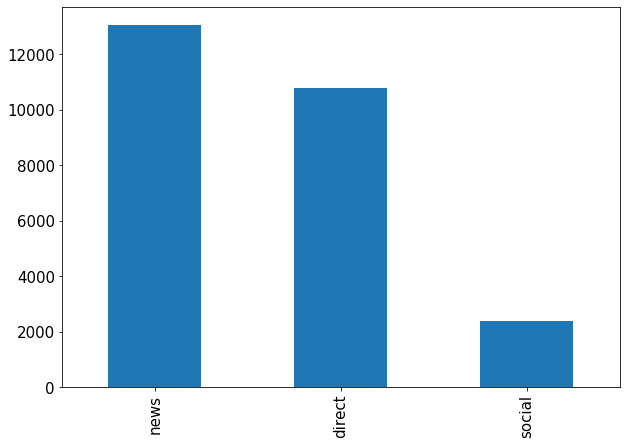

In [27]:
# number of messages by genre
df.genre.value_counts().plot(kind='bar', figsize=(10,7), fontsize = 15);

There are a lot more messages from news and direct messages than from social media. 

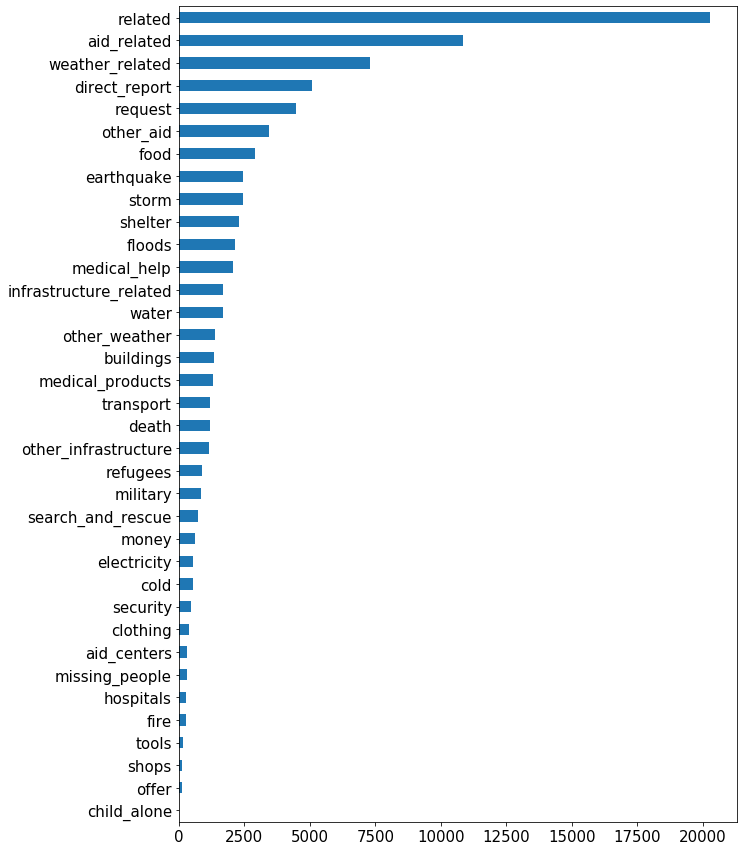

In [28]:
# distribution of messages by label
df.iloc[:,4:].sum().sort_values(ascending = True).plot(kind='barh', figsize=(10,15), fontsize = 15);

In [29]:
# number of messages by label
df.iloc[:,4:].sum()

related                   20282
request                   4474 
offer                     118  
aid_related               10860
medical_help              2084 
medical_products          1313 
search_and_rescue         724  
security                  471  
military                  860  
child_alone               0    
water                     1672 
food                      2923 
shelter                   2314 
clothing                  405  
money                     604  
missing_people            298  
refugees                  875  
death                     1194 
other_aid                 3446 
infrastructure_related    1705 
transport                 1201 
buildings                 1333 
electricity               532  
tools                     159  
hospitals                 283  
shops                     120  
aid_centers               309  
other_infrastructure      1151 
weather_related           7297 
floods                    2155 
storm                     2443 
fire    

The set of messages are hightly unbalanced. There are some categories that have a lot more messages than others.
 In fact, child_alone does not have any message. We are going to deltete this label.

In [30]:
df = df.drop(columns = ['child_alone'])

The category related is not binary. We need to know what to do  to convert it to a binary category.

In [31]:
df[df.related == 2]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,"Dans la zone de Saint Etienne la route de Jacmel est bloqu, il est trsdifficile de se rendre Jacmel",Nan zon st. etine rout jakmel la bloke se mize pr nou al jakmel,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,263,. .. i with limited means. Certain patients come from the capital.,t avec des moyens limites. Certains patients viennent de la Capital,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307,373,The internet caf Net@le that's by the Dal road by the Maranata church ( incomplete ),Cyber cafe net@le ki chita rout de dal tou pr legliz maranata.,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
462,565,"Bonsoir, on est a bon repos aprs la compagnie teleko sur la route a droite de l'impasse Roger colas aprs la 9e maison sur la main droite de la rue, on est environ 30 personnes sur un. ..",Bonswa nou nan bon repo apri teleko nan wout ti sou la men dwat imp. Roger colas apri nevim kay sou la men dwat nou anviwon 30 moun sou yon taren nou pa,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
578,700,URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX DES MISSIONS IMPASSE BALEV BUTTE BOYER MANQUE EAU ET NOURRITURE N ONT VU AUCUN SECOURS DEPUIS 8 JOURS HELP HELP,r et Salon Furterer. mwen se yon Cosmtologue. Biochimiste. Pathologis,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20465,23662,transferred to a sanitary landfill site by a,NaN,news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20636,23861,Families also have solar lamps which can be recharged at charging stations in each community.,NaN,news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22481,25874,Read the [full blog post](http://www.odi.org.uk/opinion/details.asp?id=6777&title=somalia-horn-africa-humanitarian-crisis-independent-commission-aid-impact-icai-dfid) by Simon Levine.,NaN,news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23537,27071,"Actualmente e independientemente de la ayuda de socorro inmediato que está proporcionando en el terreno los equipos diocesanos de Caritas Pakistán, las cuatro organizaciones miembros de Caritas que ya operan en Pakistán están haciendo la planificacin para responder a la emergencia de las actuales inundaciones.",NaN,news,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The value relate=2 could mean that the text message is not clear wether it is in English or not.

We cans see with the library `langdetect` if we can extract some conclusion.

In [32]:
# detect the language of the message.

langdet = []
for index, row in df.iterrows():

    try:
        language = detect(row.message)
    except:
        language = "unknown"

    langdet.append(language)
    

lang = pd.Series(langdet)
df['lang'] = lang.values    

In [33]:
df['lang'].value_counts()

en         25813
fr         53   
de         51   
pt         35   
id         34   
nl         31   
af         29   
so         25   
es         21   
ca         19   
it         16   
da         14   
vi         13   
no         9    
sq         7    
tl         7    
et         6    
unknown    5    
cy         5    
sw         5    
pl         3    
tr         3    
sv         3    
fi         3    
ro         2    
sk         1    
sl         1    
hu         1    
hr         1    
Name: lang, dtype: int64

In [34]:
df[df['lang'] != 'en'].shape

(403, 40)

In [35]:
df[df['related'] == 2].shape

(188, 40)

In [36]:
df[df.lang == 'it']['message']

468      We're in Erice street, zone Peguy-Ville ( Petion Ville area )                                                                               
613      I need rice, flour, oil, milk, sugar, spaghetti, water, , magi, tomato paste, cheese ( no locator information in text )                     
5055     I am quite ill and cannot find care.                                                                                                        
6197     I'm a girl, I'm 16. Can I participate?                                                                                                      
6524     tell me what i supposed to do.                                                                                                              
7284     I have got no mosquito net,I want one.                                                                                                      
7579     Haiti don't collapse stay still                                                            

Firstly langdetect does not seem very accurate. There are sentences in English that are detected as other languages.

Let's see what happens with the messgaes that were not recogniced as English in function of the value of the column related.

The idea is that if the messages with `related = 2` and recongnized as not English messages are correctly classified as not English, probably we can remove them.

We will take a look to some of them randomly:


In [37]:
# see not English messages with related=2
df[(df['lang'] != 'en') & (df['related'] == 2)].message.sample(30)

12258    Aijaz ahmed dit khairpur meirs thahsel nara vlage misale goth tajal shref yhan sind blochastan se 300khandan hm mojod han hman tkreban do mah se koi i                                                                                                      
117      Dans la zone de Saint Etienne la route de Jacmel est bloqu, il est trsdifficile de se rendre  Jacmel                                                                                                                                                        
6518     Midi Estimene:rue Lambert Prolongee and rue Merilus #4 (Petion-ville)                                                                                                                                                                                       
12146    Hamar         Ghair Sirkare Adare      krwao    kro    n kons Chez kons ilika   ky Chez? Plz    Sirkare (SRSO) Adara ( ) ( Crecent Hillah) Ahmar (Takhleeq foundition) (Pirbha                               

In [38]:
# see not English messages with related=1
df[(df['lang'] != 'en') & (df['related'] == 1)].message.sample(30)

5432     We are in Laplaine, Marin 10. We need tent.                                                                                                                                                                                                           
723      Message received. Message recu. Mesaj ou ale BERIBHTEN INBOX                                                                                                                                                                                          
6332     Is Latortue not in Haiti. We've gotten no help here.                                                                                                                                                                                                  
8508     Cyclone Cyclonecyclone) Cyclone                                                                                                                                                                                                

In [39]:
# see not English messages with related=0
df[(df['lang'] != 'en') & (df['related'] == 0)].message.sample(30)

2205     HOW can do you help me please?                                                                                                              
21696    See http://www.iwpr.net/index.pl?local_caucasus/caucasus_panorama.html                                                                      
6177     WE NEED JOBS IN ACCOUNTING ,MARKETING AGENT,PLOMBER,ELECTRIC,                                                                               
334      cyber cafe global univercell cabaret 35 km from port au prince                                                                              
8065     next: perpendicular line definition                                                                                                         
5676     What do I have to do to get a visa?                                                                                                         
8143     NOTES: it's not important message                                                          

In [40]:
# see not English messages with related=2
df[(df['lang'] == 'en') & (df['related'] == 2)].message.sample(30)

3033     Route des dalles prolonges #277 after Morne Jean-Pierre, thank you do. ..                                                                                                                                                                                                                                            
25385    Mali's former President Amadou Toumani Touré - though hailed internationally as a democrat, reformer, and ally in the American "war on terror"  - oversaw a system tainted by corruption at all levels.                                                                                                              
9025     please, we would like to know if itis true thereas in the moment.                                                                                                                                                                                                                                                    
4651     (Delmas 33 Charboniere infomatyon 

It seems that when `related = 2` the messages detected as not English are often actually not English. When related is equal to 0 or 1 it's not so clear. There are more messages that are detected as not English that are actually English.

Finally I have printted the message with `related = 2` and `language = English`. Normally, when `related = 2` they seem strange messages. My opinion is that `related = 2` means that the message was two stranges to fit in any category.

If we see the values for the rest of the label for each value of related, we can see that when related =2 the rest of the labes have the value 0. That means that these messages were not labeled in any category.

In [41]:
df[df['related'] == 0].describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,6122.000000,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0
mean,13819.700751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8843.881743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6731.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10467.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,22588.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,30262.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df[df['related'] == 1].describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,19906.000000,19906.0,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000,19906.000000
mean,15690.218025,1.0,0.224756,0.005928,0.545564,0.104692,0.065960,0.036371,0.023661,0.043203,0.083995,0.146840,0.116246,0.020346,0.030343,0.014970,0.043957,0.059982,0.173114,0.085653,0.060334,0.066965,0.026726,0.007988,0.014217,0.006028,0.015523,0.057822,0.366573,0.108259,0.122727,0.014167,0.123330,0.026625,0.069125,0.254948
std,8794.225162,0.0,0.417432,0.076766,0.497932,0.306164,0.248218,0.187216,0.151995,0.203319,0.277387,0.353955,0.320528,0.141183,0.171533,0.121437,0.205004,0.237459,0.378355,0.279857,0.238110,0.249967,0.161284,0.089018,0.118387,0.077410,0.123623,0.233412,0.481881,0.310715,0.328132,0.118180,0.328823,0.160989,0.253673,0.435843
min,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7896.250000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16595.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23058.750000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,30265.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df[df['related'] == 2].describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,188.000000,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0
mean,11703.340426,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5479.507080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,146.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8956.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,13770.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14376.750000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,29126.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For all these reasons I think that maybe the best option is to delete the messages with value `related = 2`. Many of these messages are not in English and the other ones are messages that can be a little confusing.

In [44]:
# delete all messages with related = 2.
df = df[~(df['related'] == 2)]

In [45]:
pd.reset_option('display.max_colwidth')

### 8. Analyze the length of the messages.

In [46]:
df['len'] = df.message.apply(len)

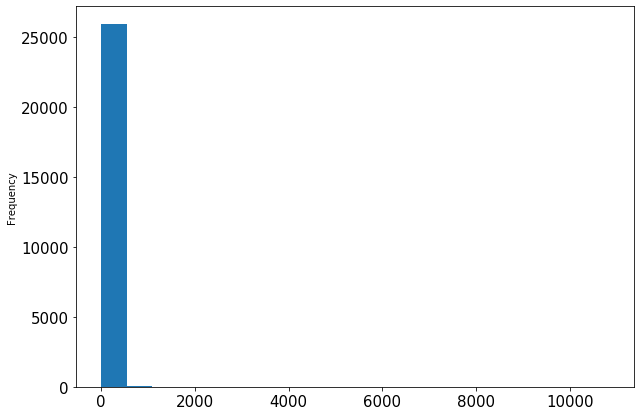

In [47]:
# plot the distribution of the length of the messages
df['len'].plot(kind = 'hist', bins = 20, figsize=(10,7), fontsize = 15);

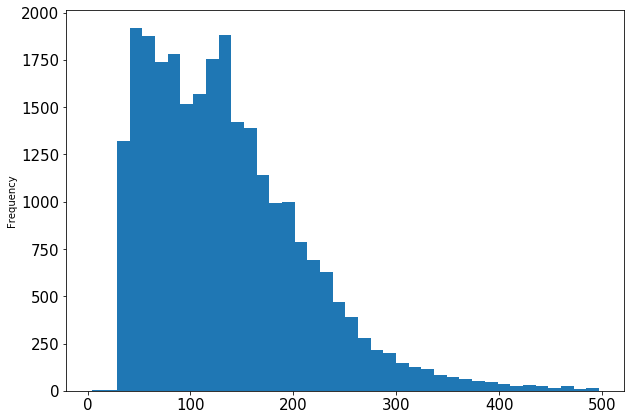

In [48]:
df[df['len'] < 500]['len'].plot(kind = 'hist', bins = 40, figsize=(10,7), fontsize = 15);

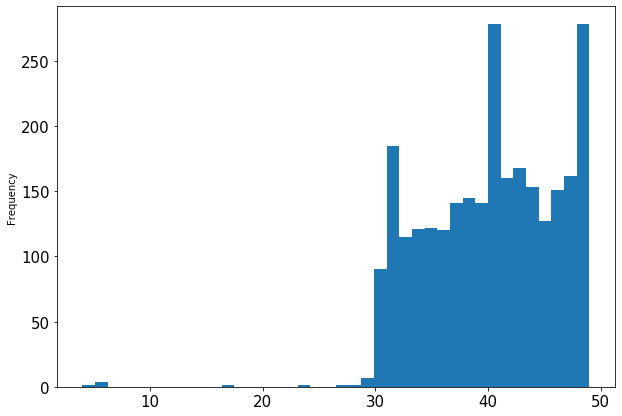

In [49]:
df[df['len'] < 50]['len'].plot(kind = 'hist', bins = 40, figsize=(10,7), fontsize = 15);

There are a few messages with very short length. They don't see very meaningful. I think that it is going to be better to delete them.

In [50]:
df[df['len'] < 27]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,...,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,lang,len
6839,7700,paklascencion##s,Paklascencion##s,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,es,17
12293,14315,,a,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,4
12332,14439,PIDE .,PIDE . a,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vi,24
16657,19448,#NAME?,NaN,news,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vi,6
21873,25213,#NAME?,NaN,news,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vi,6
22653,26062,#NAME?,NaN,news,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vi,6
22863,26309,#NAME?,NaN,news,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,vi,6


In [51]:
# delete message with less tha 27 chars
df = df[df['len'] >= 27]

Let's see the distribution of the very long messages:

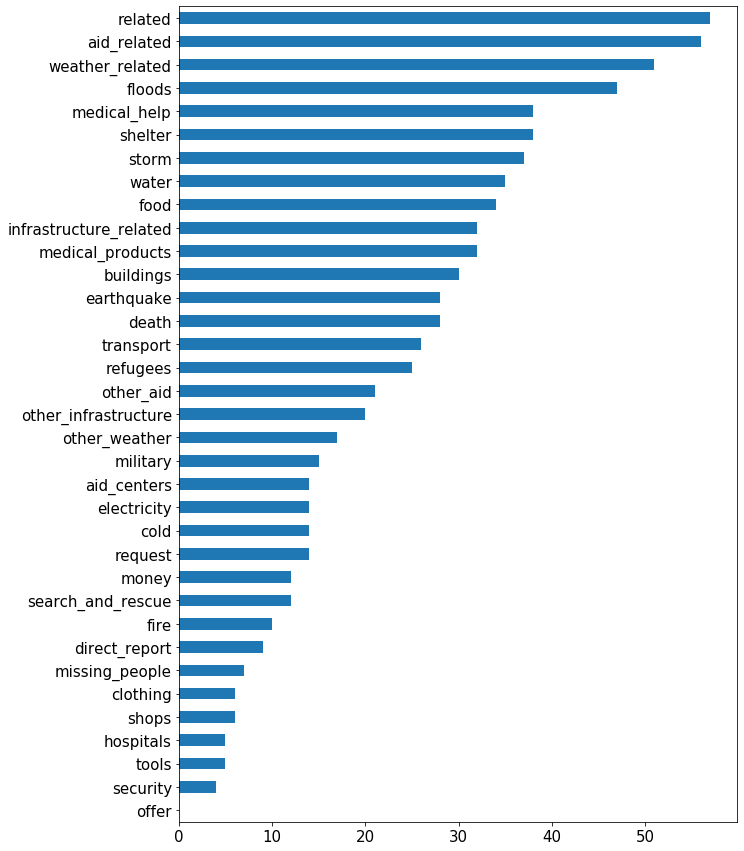

In [52]:
df[df['len'] >= 1500].iloc[:,4:-2].sum().sort_values(ascending = True).plot(kind='barh', figsize=(10,15), fontsize = 15);

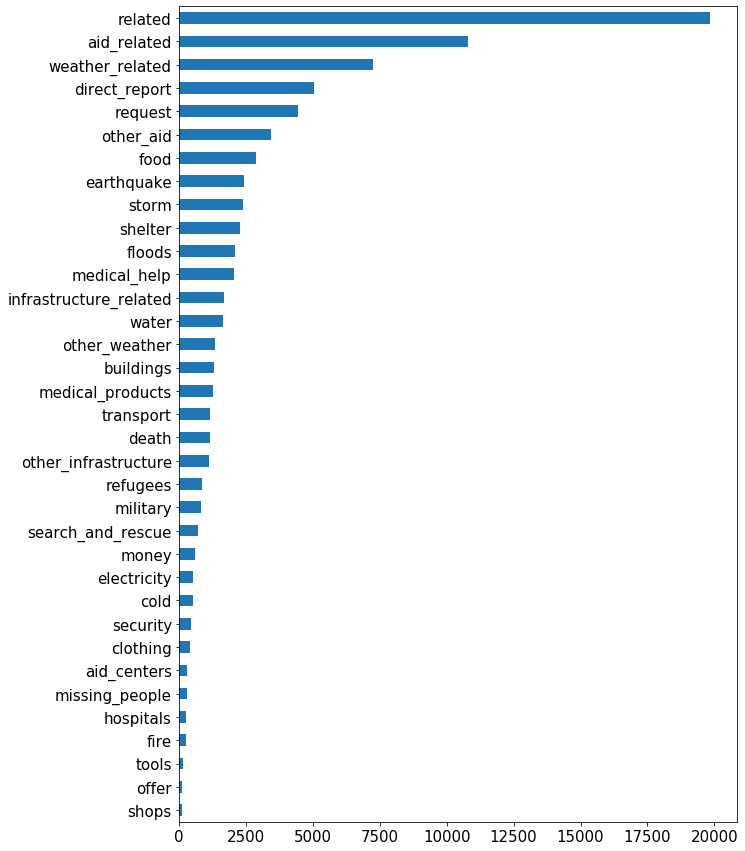

In [53]:
df[df['len'] < 1500].iloc[:,4:-2].sum().sort_values(ascending = True).plot(kind='barh', figsize=(10,15), fontsize = 15);

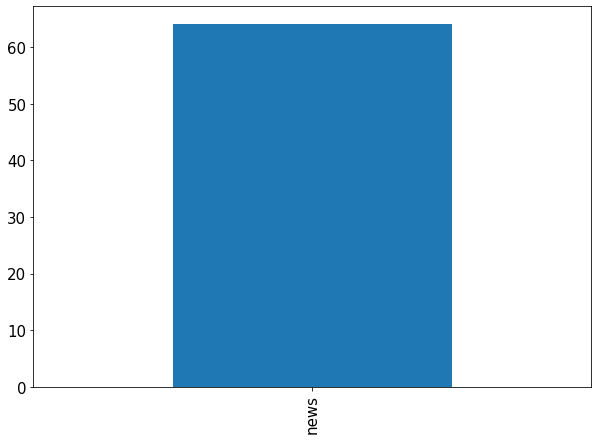

In [54]:
df[df['len'] >= 1400].genre.value_counts().plot(kind='bar', figsize=(10,7), fontsize = 15);

Those messages with a length greater than 1500 chars belongs to the group news, which seems logical. We don't apreciate a clear prefference of this tipe os messages for a specific group of labels.

We are not goin to do anything with these messages.

In [55]:
# finally we drop the columns lang and len that  we have created if we are not goin to use them in the model.
df = df.drop(columns = ['lang'])
df = df.drop(columns = ['len'])

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [56]:
engine = db.create_engine('sqlite:///DisasterResponse.db')
connection = engine.connect()
df.to_sql('messages', engine, index=False, if_exists='replace')

In [57]:
metadata = db.MetaData()
table = db.Table('messages', metadata, autoload=True, autoload_with=engine)

query = db.select([table])
result_proxy = connection.execute(query)
result_df = pd.DataFrame(result_proxy.fetchall())
result_df.columns = result_proxy.keys()
connection.close()
result_df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.